In [1]:
import pandas as pd
import matplotlib.pyplot as plt

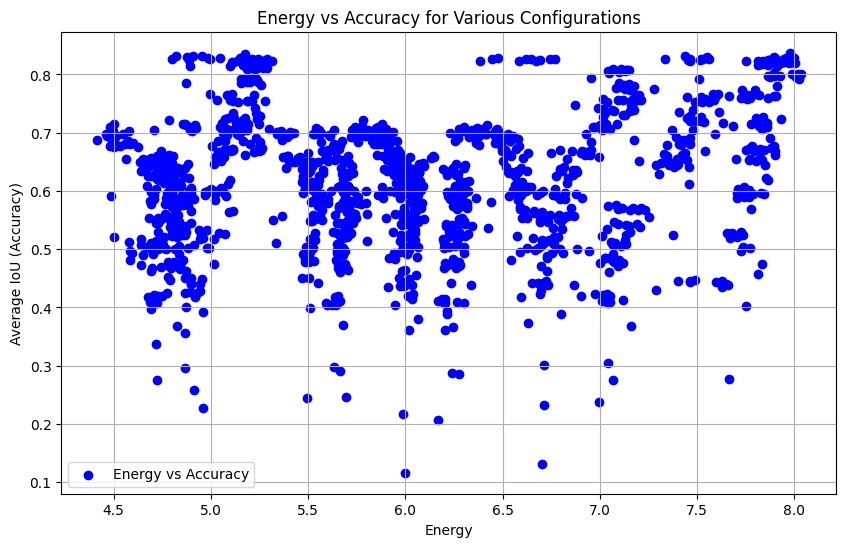

In [2]:
# Load the CSV files
accuracy_df = pd.read_csv('accuracy.csv')  # File containing "Average IoU"
energy_files = ['1_5ghz-1.csv', '1_8ghz-1.csv', '2_1ghz-1.csv', '2_4ghz-1.csv']  # Energy files

# Merge all energy files into one DataFrame
energy_df = pd.concat([pd.read_csv(f) for f in energy_files], ignore_index=True)

# Merge the accuracy and energy data on common columns
merged_df = pd.merge(accuracy_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='Energy vs Accuracy')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title('Energy vs Accuracy for Various Configurations')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

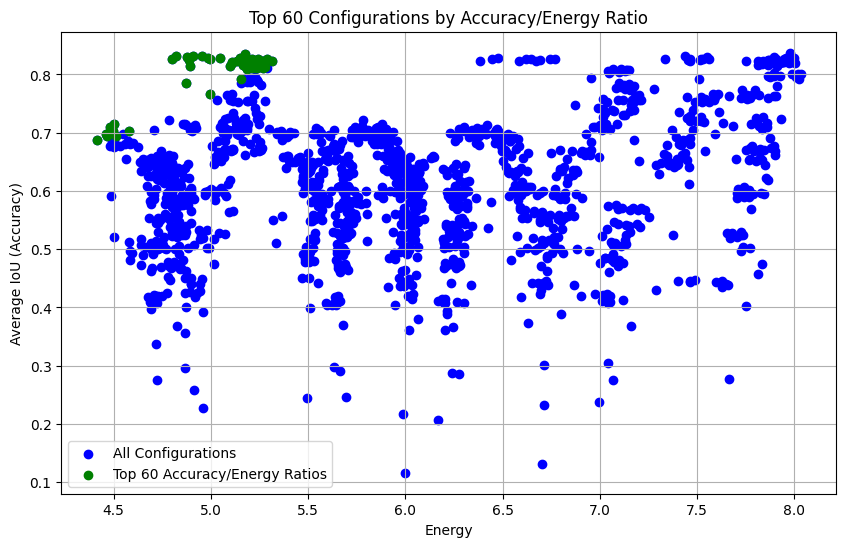

Top 60 Configurations by Accuracy/Energy Ratio:


,Frequency,Filter,Threshold,Frame Bitrate,Average IoU,Avg Energy,Accuracy to Energy Ratio
252,1.5,pixel,0.0000,3000,0.8310,4.818542,0.172459
245,1.5,pixel,0.0000,1000,0.8260,4.801466,0.172031
243,1.5,pixel,0.0000,400,0.8297,4.879438,0.170040
246,1.5,pixel,0.0000,1300,0.8312,4.906838,0.169396
250,1.5,pixel,0.0000,2400,0.8255,4.887200,0.168911
251,1.5,pixel,0.0000,2700,0.8321,4.952780,0.168007
244,1.5,pixel,0.0000,700,0.8138,4.891927,0.166356
249,1.5,pixel,0.0000,2100,0.8276,4.986178,0.165979
247,1.5,pixel,0.0000,1600,0.8271,4.994458,0.165604
248,1.5,pixel,0.0000,1900,0.8275,5.048415,0.163913


In [3]:
# Calculate the accuracy/energy ratio
merged_df['Accuracy to Energy Ratio'] = merged_df['Average IoU'] / merged_df['Avg Energy']

# Get the top k configurations by Accuracy to Energy Ratio
k = 60  # Change this to the number of configurations you want
top_k_df = merged_df.nlargest(k, 'Accuracy to Energy Ratio')

# Plotting the full dataset
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='All Configurations')

# Plot the top k configurations
plt.scatter(top_k_df['Avg Energy'], top_k_df['Average IoU'], color='g', label=f'Top {k} Accuracy/Energy Ratios')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title(f'Top {k} Configurations by Accuracy/Energy Ratio')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

# Output the top k configurations
print(f"Top {k} Configurations by Accuracy/Energy Ratio:")
top_k_df

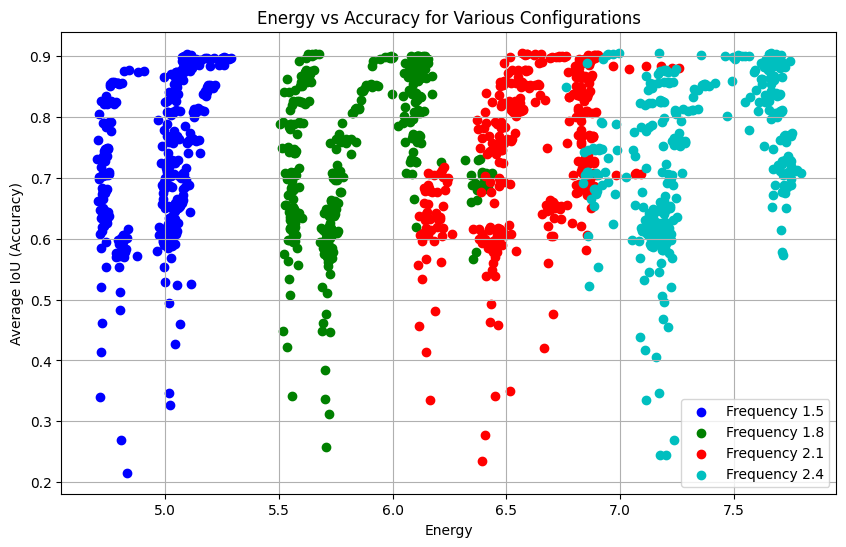

In [7]:
# Load the CSV files
accuracy_df = pd.read_csv('accuracy-JH-1.csv')  # File containing "Average IoU"
energy_files = ['energy-JH-1.csv']  # Energy files

# Merge all energy files into one DataFrame
energy_df = pd.concat([pd.read_csv(f) for f in energy_files], ignore_index=True)

# Merge the accuracy and energy data on common columns
merged_df = pd.merge(accuracy_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# Plotting
plt.figure(figsize=(10, 6))
# plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='Energy vs Accuracy')

colors = ['b', 'g', 'r', 'c']  # Adjust/add more colors if needed

# Plot each frequency as a different color
for i, (frequency, group) in enumerate(merged_df.groupby('Frequency')):
    plt.scatter(group['Avg Energy'], group['Average IoU'], color=colors[i % len(colors)], label=f'Frequency {frequency}')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title('Energy vs Accuracy for Various Configurations')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

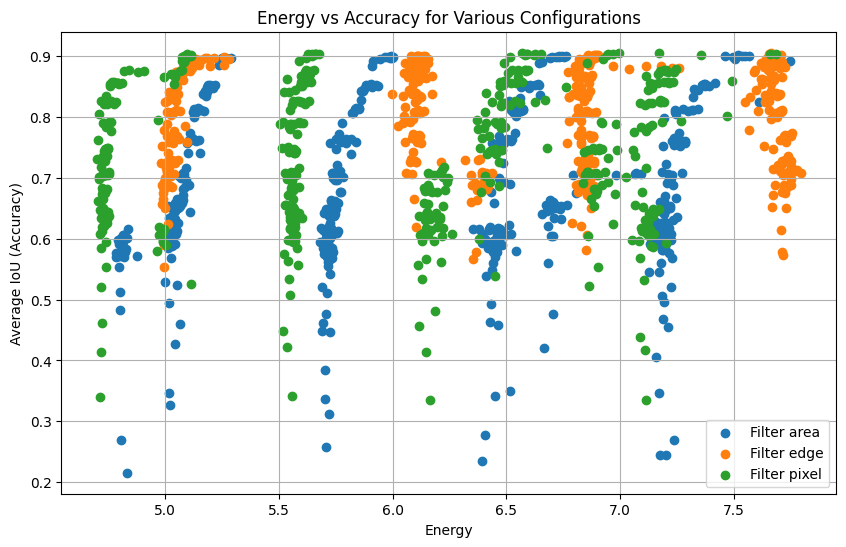

In [41]:
plt.figure(figsize=(10, 6))

for i, (frequency, group) in enumerate(merged_df.groupby('Filter')):
    plt.scatter(group['Avg Energy'], group['Average IoU'], label=f'Filter {frequency}')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title('Energy vs Accuracy for Various Configurations')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

In [39]:
import numpy as np

def get_lowest_energy_configuration_for_accuracy(df, accuracy_threshold):
    # Filter for rows where Average IoU (accuracy) is equal to or greater than the specified threshold
    filtered_df = df[df['Average IoU'] >= accuracy_threshold]
    
    # If there are no rows that meet the accuracy threshold, return None
    if filtered_df.empty:
        return None
    
    # Find the row with the minimum energy value in the filtered DataFrame
    min_energy_row = filtered_df.loc[filtered_df['Avg Energy'].idxmin()]
    
    # Return only the configuration details along with energy and accuracy
    configuration = min_energy_row[['Frequency', 'Filter', 'Threshold', 'Frame Bitrate', 'Avg Energy', 'Average IoU']]
    return configuration

# Example usage with accuracy threshold of 0.8
accuracy_threshold = 0.905
config_thresh_df = pd.DataFrame(columns=['Frequency', 'Filter', 'Threshold', 'Frame Bitrate', 'Avg Energy', 'Average IoU', 'Accuracy Threshold'])

for thresh in np.arange(0.70, 0.91, 0.01):
    lowest_energy_configuration = get_lowest_energy_configuration_for_accuracy(merged_df, thresh)
    if lowest_energy_configuration is None:
        continue
    lowest_energy_configuration['Accuracy Threshold'] = thresh
    config_thresh_df.loc[-1] = lowest_energy_configuration
    config_thresh_df.index = config_thresh_df.index + 1

config_thresh_df
# lowest_energy_configuration = get_lowest_energy_configuration_for_accuracy(merged_df, accuracy_threshold)

# if lowest_energy_configuration is not None:
#     print("Configuration with lowest energy for specified accuracy:")
#     print(lowest_energy_configuration)
# else:
#     print("No configuration found with the specified accuracy.")

,Frequency,Filter,Threshold,Frame Bitrate,Avg Energy,Average IoU,Accuracy Threshold
20,1.5,pixel,0.03,100,4.69967,0.731,0.7
19,1.5,pixel,0.03,100,4.69967,0.731,0.71
18,1.5,pixel,0.03,100,4.69967,0.731,0.72
17,1.5,pixel,0.03,100,4.69967,0.731,0.73
16,1.5,pixel,0.04,400,4.708,0.762,0.74
15,1.5,pixel,0.04,400,4.708,0.762,0.75
14,1.5,pixel,0.04,400,4.708,0.762,0.76
13,1.5,pixel,0.03,400,4.710882,0.8044,0.77
12,1.5,pixel,0.03,400,4.710882,0.8044,0.78
11,1.5,pixel,0.03,400,4.710882,0.8044,0.79


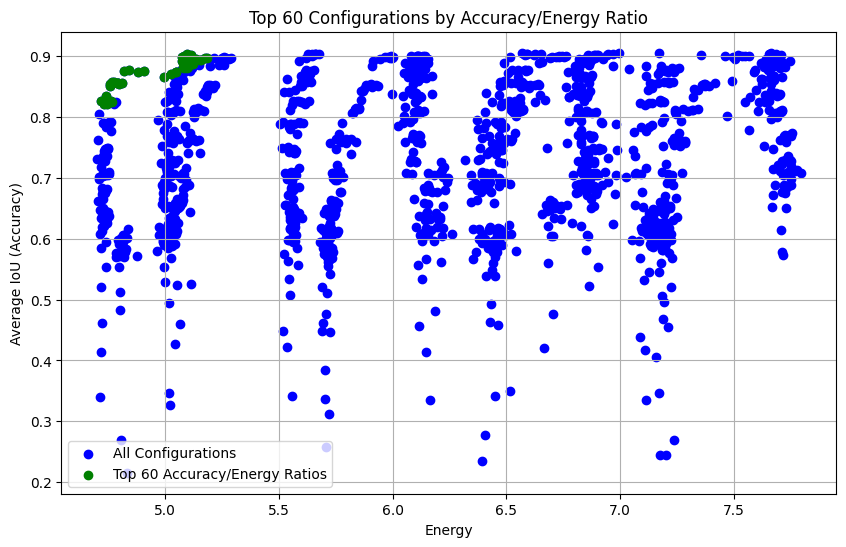

Top 60 Configurations by Accuracy/Energy Ratio:


,Frequency,Filter,Threshold,Frame Bitrate,Average IoU,Avg Energy,Accuracy to Energy Ratio
261,1.5,pixel,0.0100,2400,0.8756,4.821895,0.181588
263,1.5,pixel,0.0100,3000,0.8775,4.840198,0.181294
273,1.5,pixel,0.0200,2700,0.8577,4.769823,0.179818
274,1.5,pixel,0.0200,3000,0.8576,4.774741,0.179612
267,1.5,pixel,0.0200,1000,0.8538,4.760121,0.179365
260,1.5,pixel,0.0100,2100,0.8738,4.880211,0.179050
266,1.5,pixel,0.0200,700,0.8510,4.760728,0.178754
272,1.5,pixel,0.0200,2400,0.8563,4.791286,0.178720
271,1.5,pixel,0.0200,2100,0.8562,4.793042,0.178634
269,1.5,pixel,0.0200,1600,0.8565,4.796129,0.178582


In [6]:
# Calculate the accuracy/energy ratio
merged_df['Accuracy to Energy Ratio'] = merged_df['Average IoU'] / merged_df['Avg Energy']

# Get the top k configurations by Accuracy to Energy Ratio
k = 60  # Change this to the number of configurations you want
top_k_df = merged_df.nlargest(k, 'Accuracy to Energy Ratio')

# Plotting the full dataset
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='All Configurations')

# Plot the top k configurations
plt.scatter(top_k_df['Avg Energy'], top_k_df['Average IoU'], color='g', label=f'Top {k} Accuracy/Energy Ratios')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title(f'Top {k} Configurations by Accuracy/Energy Ratio')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

# Output the top k configurations
print(f"Top {k} Configurations by Accuracy/Energy Ratio:")
top_k_df